In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

In [101]:
train = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Cross_Sell_train.csv')
test = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Cross_Sell_test.csv')
submission = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Cross_Sell_sample_submission_iA3afxn.csv')

### Pre-processing of Train & Test data

In [102]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [103]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [217]:
train.shape,test.shape,submission.shape

((381109, 13), (127037, 12), (127037, 2))

In [105]:
train['source']='train'
test['source']='test'

In [122]:
data = pd.concat([train,test]).reset_index(drop=True)

In [123]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN,test
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN,test
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN,test


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  source                508146 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 50.4+ MB


In [125]:
data['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [126]:
df = pd.get_dummies(data['Vehicle_Age'],prefix='Vehicle_Age ')

In [127]:
data = pd.concat([data,df], axis=1).drop(columns ='Vehicle_Age')

In [129]:
data['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace = True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      508146 non-null  int64  
 1   Gender                  508146 non-null  int64  
 2   Age                     508146 non-null  int64  
 3   Driving_License         508146 non-null  int64  
 4   Region_Code             508146 non-null  float64
 5   Previously_Insured      508146 non-null  int64  
 6   Vehicle_Damage          508146 non-null  int64  
 7   Annual_Premium          508146 non-null  float64
 8   Policy_Sales_Channel    508146 non-null  float64
 9   Vintage                 508146 non-null  int64  
 10  Response                381109 non-null  float64
 11  source                  508146 non-null  object 
 12  Vehicle_Age _1-2 Year   508146 non-null  uint8  
 13  Vehicle_Age _< 1 Year   508146 non-null  uint8  
 14  Vehicle_Age _> 2 Yea

### Descriptive Analysis of the data

<AxesSubplot:>

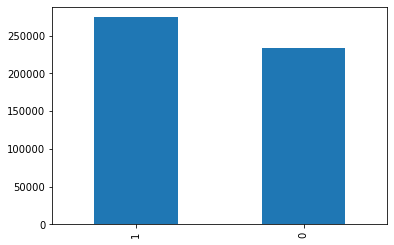

In [244]:
data['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

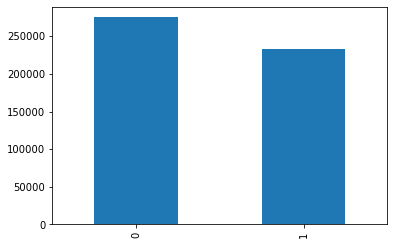

In [246]:
data['Previously_Insured'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Vehicle_Damage'>

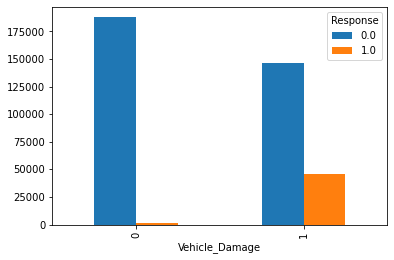

In [256]:
pd.crosstab(data['Vehicle_Damage'],data['Response']).plot(kind = 'bar')

<AxesSubplot:xlabel='Previously_Insured'>

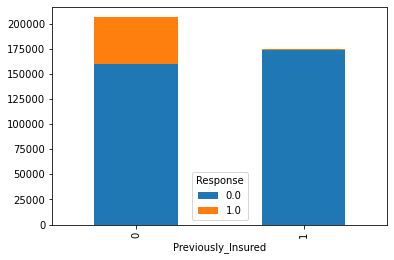

In [264]:
pd.crosstab(data['Previously_Insured'],data['Response']).plot(kind = 'bar', stacked = True)

In [257]:
data[['Vintage','Response']].corr()

,Vintage,Response
Vintage,1.00000,-0.00105
Response,-0.00105,1.00000


<AxesSubplot:>

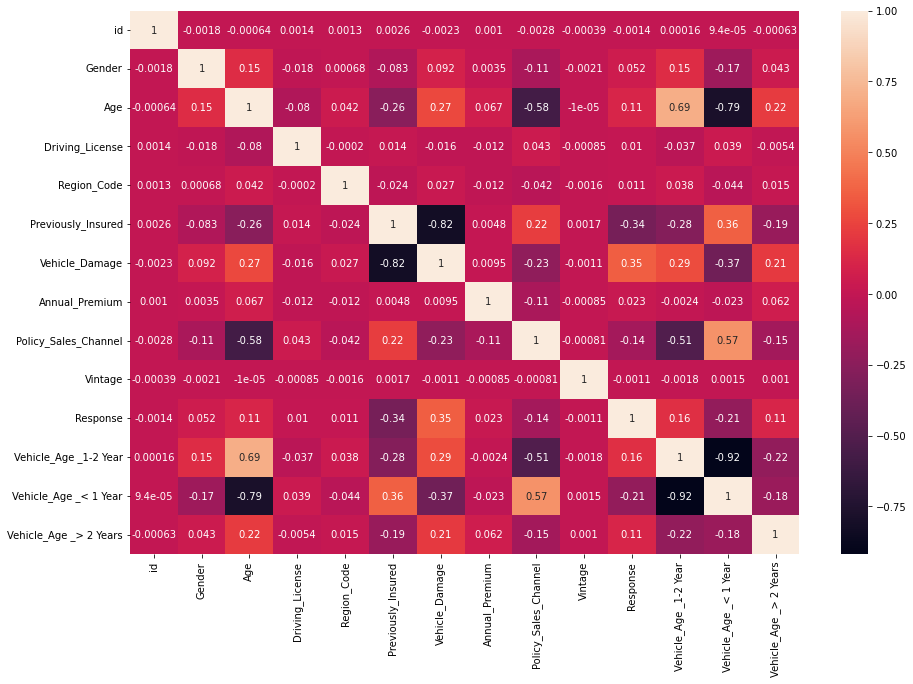

In [263]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot=True)

In [154]:
train_preprocessed = data[data['source']=='train'].drop(columns = 'source')
test_preprocessed = data[data['source']=='test'].drop(columns = 'source').reset_index(drop=True)

### Modeling

In [155]:
train_preprocessed.shape, test_preprocessed.shape

((381109, 14), (127037, 14))

In [133]:
test_preprocessed

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age _1-2 Year,Vehicle_Age _< 1 Year,Vehicle_Age _> 2 Years
0,381110,1,25,1,11.0,1,0,35786.0,152.0,53,NaN,0,1,0
1,381111,1,40,1,28.0,0,1,33762.0,7.0,111,NaN,1,0,0
2,381112,1,47,1,28.0,0,1,40050.0,124.0,199,NaN,1,0,0
3,381113,1,24,1,27.0,1,1,37356.0,152.0,187,NaN,0,1,0
4,381114,1,27,1,28.0,1,0,59097.0,152.0,297,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,30867.0,152.0,56,NaN,0,1,0
127033,508143,0,38,1,28.0,0,1,28700.0,122.0,165,NaN,1,0,0
127034,508144,1,21,1,46.0,1,0,29802.0,152.0,74,NaN,0,1,0
127035,508145,1,71,1,28.0,1,0,62875.0,26.0,265,NaN,1,0,0


In [156]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      381109 non-null  int64  
 1   Gender                  381109 non-null  int64  
 2   Age                     381109 non-null  int64  
 3   Driving_License         381109 non-null  int64  
 4   Region_Code             381109 non-null  float64
 5   Previously_Insured      381109 non-null  int64  
 6   Vehicle_Damage          381109 non-null  int64  
 7   Annual_Premium          381109 non-null  float64
 8   Policy_Sales_Channel    381109 non-null  float64
 9   Vintage                 381109 non-null  int64  
 10  Response                381109 non-null  float64
 11  Vehicle_Age _1-2 Year   381109 non-null  uint8  
 12  Vehicle_Age _< 1 Year   381109 non-null  uint8  
 13  Vehicle_Age _> 2 Years  381109 non-null  uint8  
dtypes: float64(4), int64

In [160]:
X = train_preprocessed.drop(columns = 'Response')
y = train_preprocessed['Response']

In [161]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 32)

### Accuracy testing with GaussianNB()

In [162]:
model = GaussianNB()

In [163]:
model.fit(train_X, train_y)

GaussianNB()

In [164]:
train_pred = model.predict(train_X)

In [165]:
GB_acc_scr = accuracy_score(train_pred, train_y)
GB_acc_scr

0.8760533181395628

In [173]:
model_test = model.fit(train_X, train_y)

In [174]:
test_pred = model_test.predict(test_X)
GB_test_acc_scr = accuracy_score(test_pred, test_y)
GB_test_acc_scr

0.8762911845224038

### Accuracy testing with Multinomial()

In [166]:
model_2 = MultinomialNB()

In [179]:
model_2.fit(train_X, train_y)

MultinomialNB()

In [168]:
train_pred_2 = model_2.predict(train_X)
MNB_acc_scr = accuracy_score(train_pred_2,train_y)
MNB_acc_scr

0.5184686778420847

In [177]:
model_test_2 = model_2.fit(test_X, test_y)
test_pred_2 = model_test_2.predict(test_X)
GB_test_acc_scr = accuracy_score(test_pred_2, test_y)
GB_test_acc_scr

0.5190627377922384

### Accuracy testing with BernoulliNB()

In [170]:
model_3 = BernoulliNB()
model_3.fit(train_X, train_y)

BernoulliNB()

In [171]:
train_pred_3 = model_3.predict(train_X)

In [172]:
BNB_acc_scr = accuracy_score(train_pred_3, train_y)
BNB_acc_scr

0.7208182145320419

In [228]:
model_test_3 = model_3.fit(test_X, test_y)
test_pred_3 = model_test_3.predict(test_X)
GB_test_acc_scr = accuracy_score(test_pred_3, test_y)
GB_test_acc_scr
f1 = f1_score(test_pred_3, test_y)
f1
con_mat = confusion_matrix(test_pred_3, test_y)
con_mat

array([[70679,  2449],
       [29673, 11532]], dtype=int64)

### Accuracy testing with LogisticsRgression()

In [230]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((266776, 13), (266776,), (114333, 13), (114333,))

In [187]:
model_lin = LogisticRegression()

In [188]:
model_lin.fit(train_X, train_y)

LogisticRegression()

In [189]:
train_pred_lin = model_lin.predict(train_X)

In [190]:
Lin_acc_scr = accuracy_score(train_pred_lin, train_y)
Lin_acc_scr

0.8773165502144121

In [227]:
model_lin.fit(test_X,test_y)
test_pred_lin = model_lin.predict(test_X)
print('Accuracy_Score', accuracy_score(test_pred_lin, test_y))
print('F1_Score',f1_score(test_pred_lin, test_y))
print('Confusion Matric\n',confusion_matrix(test_pred_lin, test_y))

Accuracy_Score 0.8777168446555238
F1_Score 0.0
Confusion Matric
 [[100352  13981]
 [     0      0]]


### Accuracy testing with RandomForest()

In [239]:
model_RF = RandomForestClassifier()
model_RF.fit(train_X, train_y)

RandomForestClassifier()

In [234]:
train_pred_RF = model_RF.predict(train_X)
RF_acc_scr = accuracy_score(train_pred_RF, train_y)
RF_acc_scr

0.9999850061474795

In [242]:
model_RF.fit(test_X, test_y)
test_pred_RF = model_RF.predict(test_X)
RF_test_acc_scr = accuracy_score(test_pred_RF, test_y)
RF_test_acc_scr

0.9999825072376304

In [243]:
print('F1_Score',f1_score(test_pred_RF, test_y))
print('Confusion Matric\n',confusion_matrix(test_pred_RF, test_y))

F1_Score 0.9999284692417739
Confusion Matric
 [[100352      2]
 [     0  13979]]


#### Apply high accuracy model ( RandomForest in above case) to the Test ( Original ) data set

In [219]:
test_pp_org = test_preprocessed
test_pp_X = test_preprocessed.drop(columns = 'Response')
test_pp_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      127037 non-null  int64  
 1   Gender                  127037 non-null  int64  
 2   Age                     127037 non-null  int64  
 3   Driving_License         127037 non-null  int64  
 4   Region_Code             127037 non-null  float64
 5   Previously_Insured      127037 non-null  int64  
 6   Vehicle_Damage          127037 non-null  int64  
 7   Annual_Premium          127037 non-null  float64
 8   Policy_Sales_Channel    127037 non-null  float64
 9   Vintage                 127037 non-null  int64  
 10  Vehicle_Age _1-2 Year   127037 non-null  uint8  
 11  Vehicle_Age _< 1 Year   127037 non-null  uint8  
 12  Vehicle_Age _> 2 Years  127037 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 10.1 MB


In [236]:
y_unpred = model_RF.predict(test_pp_X)

In [237]:
submission.head()

,id,Response
0,381110,0.0
1,381111,0.0
2,381112,0.0
3,381113,0.0
4,381114,0.0


In [238]:
submission['Response']=y_unpred
submission.to_csv('submission_logreg1.csv', index = False)